# 1/ Importation du jeu de données


In [1]:
# Importation du jeu de données
import pandas as pd

# Charger le fichier CSV
data = pd.read_csv('/content/10000_observations.csv')

# Afficher les premières lignes du DataFrame
print(data.head())

    JOB_ID                                           JOB_NAME  \
0  1042719  STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...   
1  1231138          Responsable d'agence / City Manager (H/F)   
2   209747  Développeur(se) Confirmé(e) Fullstack JS (Node...   
3  1274049  💡 Business Consultant(e)  MOA - Transformation...   
4   360819                          Junior Business Developer   

                                     JOB_DESCRIPTION  \
0  **DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...   
1  Pour continuer à offrir un service de qualité ...   
2  * Conception et choix d’architecture\r\n* Déve...   
3  **Consultant Junior en transformation digitale...   
4  * Contrat : Stage\r\n* Temps de travail : Temp...   

                                             PROFILE IS_JOB_REMOTE  
0  Vous recherchez un projet innovant et excitant...            no  
1  * Bac+3 minimum\n    \n* Une première expérien...      punctual  
2  * Formation en informatique ou en ingénierie o...       partia

In [2]:
# On supprime la colonne ID

data.drop('JOB_ID', axis=1, inplace=True)

# 2/ Analyse exploratoire

In [3]:
# Vérifier la taille du jeu de données

print("Nombre d'observations :", len(data))
print("Nombre de colonnes :", len(data.columns))

Nombre d'observations : 10000
Nombre de colonnes : 4


In [4]:
# On regarde le type de nos données 

data.dtypes

JOB_NAME           object
JOB_DESCRIPTION    object
PROFILE            object
IS_JOB_REMOTE      object
dtype: object

Le type de nos données est correct

In [5]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :\n", data.isnull().sum())

Valeurs manquantes par colonne :
 JOB_NAME            0
JOB_DESCRIPTION     0
PROFILE            73
IS_JOB_REMOTE       0
dtype: int64


## Variable cible

Interessons nous tout d'abord à la colonne IS_REMOTE_JOB

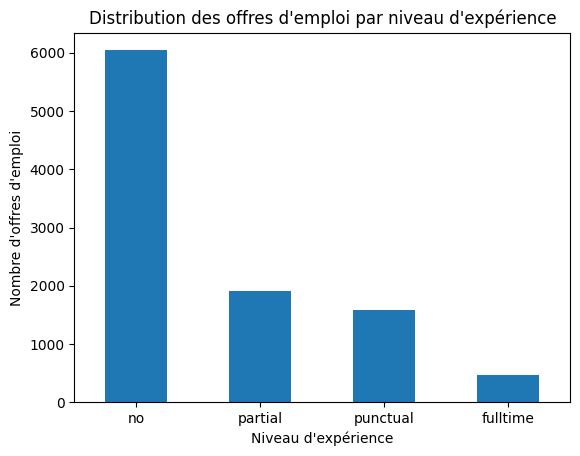

In [6]:
# Tracer un histogramme de la distribution des offres d'emploi par niveau d'expérience

import matplotlib.pyplot as plt

data['IS_JOB_REMOTE'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Niveau d\'expérience')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.title('Distribution des offres d\'emploi par niveau d\'expérience')
plt.show()

Notre variable cible comprend 4 classes et est assez déséquilibrée.

Interessons nous ensuite aux colonnes textuelles

## Variables textuelles

In [7]:
# On affiche la première observations de notre dataframe

print('Job Name:', data['JOB_NAME'][0])
print('Job DESCRIPTION:', data['JOB_DESCRIPTION'][0])
print('Job PROFILE:', data['PROFILE'][0])


Job Name: STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (H/F)
Job DESCRIPTION: **DESCRIPTION DU POSTE**

Au sein de l’équipe Production, vous travaillerez sur les missions suivantes en collaboration avec notre Ingénieur polyvalent :
•	S’imprégner du fonctionnement de l’entreprise et des différents flux.
•	Comprendre les enjeux d’un ERP dans une entreprise.
•	Documenter de manière précise l’ensemble des données de l’ERP.
•	Renseignement de la stratégie de gestion des stocks selon le type d’article.
•	Documenter des tutoriels ou guide des bonnes pratiques concernant les flux.
•	Proposer des axes d'amélioration des flux / gestion des données.

Votre stage aura tout du long une forte considération des impacts écologiques du processus de fabrication de la solution. Vous serez, dans ce cadre, potentiellement amenée à participer à une analyse du bilan carbone du processus et à évaluer les gains possibles en fonction des évolutions envisagés. 

Vous travaillerez sous la direction des Opérations

Avant de concaténer les colonnes, on fill nos NaN par des chaines de caractères vides

In [8]:
# Remplacer les valeurs NaN par une chaîne de caractères vide dans les colonnes textuelles
data['JOB_NAME'] = data['JOB_NAME'].fillna('')
data['JOB_DESCRIPTION'] = data['JOB_DESCRIPTION'].fillna('')
data['PROFILE'] = data['PROFILE'].fillna('')



Désormais, on concatène les colonnes Job_Name, Job_Description et Profile
en une colonne : job presentation

In [9]:
# Concaténer les colonnes

df_concat = data
df_concat['Job_presentation'] = data['JOB_NAME'] + ' ' + data['JOB_DESCRIPTION'] + ' ' + data['PROFILE']
df_concat.head()

,JOB_NAME,JOB_DESCRIPTION,PROFILE,IS_JOB_REMOTE,Job_presentation
0,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,**DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...,Vous recherchez un projet innovant et excitant...,no,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...
1,Responsable d'agence / City Manager (H/F),Pour continuer à offrir un service de qualité ...,* Bac+3 minimum\n \n* Une première expérien...,punctual,Responsable d'agence / City Manager (H/F) Pour...
2,Développeur(se) Confirmé(e) Fullstack JS (Node...,* Conception et choix d’architecture\r\n* Déve...,* Formation en informatique ou en ingénierie o...,partial,Développeur(se) Confirmé(e) Fullstack JS (Node...
3,💡 Business Consultant(e) MOA - Transformation...,**Consultant Junior en transformation digitale...,Vous avez le sens de l’analyse et l’envie de r...,punctual,💡 Business Consultant(e) MOA - Transformation...
4,Junior Business Developer,* Contrat : Stage\r\n* Temps de travail : Temp...,**Compétences requises :**\r\n\r\n* Fibre comm...,no,Junior Business Developer * Contrat : Stage\r\...


In [10]:
print("Valeurs manquantes par colonne :\n", df_concat.isnull().sum())

Valeurs manquantes par colonne :
 JOB_NAME            0
JOB_DESCRIPTION     0
PROFILE             0
IS_JOB_REMOTE       0
Job_presentation    0
dtype: int64


In [11]:
# Supprimer les lignes avec des valeurs manquantes
df_concat.dropna(inplace=True)

# Vérifier que les valeurs manquantes ont été supprimées
print(df_concat.isnull().sum())

JOB_NAME            0
JOB_DESCRIPTION     0
PROFILE             0
IS_JOB_REMOTE       0
Job_presentation    0
dtype: int64


In [12]:
# Calculer la taille du texte pour chaque observation

data['JOB_NAME_length'] = data['JOB_NAME'].apply(lambda x: len(str(x)))
data['JOB_DESCRIPTION_length'] = data['JOB_DESCRIPTION'].apply(lambda x: len(str(x)))
data['PROFILE_length'] = data['PROFILE'].apply(lambda x: len(str(x)))
data['Job_presentation_length'] = data['Job_presentation'].apply(lambda x: len(str(x)))

# Afficher les tailles du texte pour la 1ère observations

print(data['JOB_NAME_length'][1])
print(data['JOB_DESCRIPTION_length'][1])
print(data['PROFILE_length'][1])
print(data['Job_presentation_length'][1])

41
1097
714
1854


C'est juste pour vérif que ca a correctement concaténé les colonnes

# 3/ Choix de la langue

In [13]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from langdetect import detect

# Créer une nouvelle colonne contenant la langue de chaque observation
df_concat['langue'] = df_concat['Job_presentation'].apply(lambda x: detect(x) if pd.notnull(x) else '')

In [15]:
# Compter le nombre d'observations par langue
langue_counts = df_concat['langue'].value_counts()


# Afficher le nombre d'observations par langue
print(langue_counts)


fr    8060
en    1495
cs     311
es      35
sk      29
de      19
nl      13
it      12
ca       5
pt       5
so       3
da       3
ro       2
ja       2
no       1
af       1
tr       1
cy       1
sv       1
lv       1
Name: langue, dtype: int64


In [16]:
# Création, pour chaque langue, d'un dataframe qui ne contient que les textes en cette langue




# Création d'un dictionnaire vide pour stocker les dataframes par langue
lang_dataframes = {}

# Liste des langues
langues = ['fr', 'en', 'cs', 'es', 'sk', 'de', 'nl', 'it', 'pt', 'ja', 'da']

# Parcourir chaque langue
for langue in langues:
    # Créer un dataframe pour la langue spécifique
    lang_dataframe = df_concat[df_concat['langue'] == langue]
    
    # Stocker le dataframe dans le dictionnaire avec la langue comme clé
    lang_dataframes[langue] = lang_dataframe

In [17]:
# Créer un nouveau dataframe ne contenant que les observations en français

df_francais = df_concat[df_concat['langue'] == 'fr']
df_francais.head()

,JOB_NAME,JOB_DESCRIPTION,PROFILE,IS_JOB_REMOTE,Job_presentation,JOB_NAME_length,JOB_DESCRIPTION_length,PROFILE_length,Job_presentation_length,langue
0,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,**DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...,Vous recherchez un projet innovant et excitant...,no,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,50,2053,992,3097,fr
1,Responsable d'agence / City Manager (H/F),Pour continuer à offrir un service de qualité ...,* Bac+3 minimum\n \n* Une première expérien...,punctual,Responsable d'agence / City Manager (H/F) Pour...,41,1097,714,1854,fr
2,Développeur(se) Confirmé(e) Fullstack JS (Node...,* Conception et choix d’architecture\r\n* Déve...,* Formation en informatique ou en ingénierie o...,partial,Développeur(se) Confirmé(e) Fullstack JS (Node...,62,610,311,985,fr
3,💡 Business Consultant(e) MOA - Transformation...,**Consultant Junior en transformation digitale...,Vous avez le sens de l’analyse et l’envie de r...,punctual,💡 Business Consultant(e) MOA - Transformation...,117,639,608,1366,fr
4,Junior Business Developer,* Contrat : Stage\r\n* Temps de travail : Temp...,**Compétences requises :**\r\n\r\n* Fibre comm...,no,Junior Business Developer * Contrat : Stage\r\...,25,270,470,767,fr


In [18]:
df_francais.shape

(8060, 10)

In [19]:
df_francais.to_csv('/content/10000_observations.csv', index=False)



In [20]:
# J'enregistre le dataframe en francais sur mon mac (pour ne pas  avoir à appliquer langdetect à chaque fois)


# Définir le chemin de destination et le nom du fichier
#français_10000 = 'df_francais.csv'
#chemin_destination = '/Users/vincentlagarde/Desktop/NLP_Project/Datas' + français_10000  # Remplacez 'Nom_dossier' par le nom du dossier de destination souhaité

# Enregistrer le dataframe en tant que fichier CSV
#df_francais.to_csv(chemin_destination, index=False)

#print("Le fichier", français_10000, "a été enregistré avec succès dans votre bureau.")


# 4/ Prétaitement du Texte


In [19]:
df_concat=df_francais

In [22]:
df_concat.shape

(40711, 10)

In [23]:
df_concat.dtypes

JOB_NAME                   object
JOB_DESCRIPTION            object
PROFILE                    object
IS_JOB_REMOTE              object
Job_presentation           object
JOB_NAME_length             int64
JOB_DESCRIPTION_length      int64
PROFILE_length              int64
Job_presentation_length     int64
langue                     object
dtype: object

## Pré-Processing

In [20]:
# Enlever les balises HTML

import re

def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data



In [21]:
df_concat['Job_presentation_processed'] = df_concat['Job_presentation'].apply(remove_html)


<ipython-input-21-419d28dd04c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Job_presentation_processed'] = df_concat['Job_presentation'].apply(remove_html)


In [26]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter



# Prétraitement du texte
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('french'))
lemmatizer = WordNetLemmatizer()


# Définir les mots vides
stop_words = set(stopwords.words('french'))

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement du texte

import re

def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    
    # Supprimer la ponctuation et les caractères spéciaux
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    
    # Tokenization des mots
    tokens = word_tokenize(text)
    
    # Supprimer les mots vides
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatisation des mots
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# Appliquer la fonction de prétraitement sur la colonne 'Job_presentation'
df_concat['Job_presentation_processed'] = df_concat['Job_presentation'].apply(preprocess_text)


# Calculer la fréquence des mots
word_freq = Counter()
for tokens in df_concat['Job_presentation_processed']:
    word_freq.update(tokens)

# Afficher les 10 mots les plus fréquents
print(word_freq.most_common(10))

<ipython-input-27-cacea59b367e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Job_presentation_processed'] = df_concat['Job_presentation'].apply(preprocess_text)


[('client', 70829), ('mission', 49545), ('dune', 37891), ('gestion', 37301), ('plus', 36182), ('développement', 33924), ('équipe', 33500), ('service', 31292), ('expérience', 31044), ('formation', 30442)]


In [28]:
df_concat['Job_presentation_processed'][0]

['data',
 'engineer',
 'être',
 'data',
 'engineer',
 'chez',
 'wewyse',
 'cest',
 'intégrer',
 'communauté',
 'dexperts',
 'data',
 'passionnés',
 'recevoir',
 'partager',
 'connaissance',
 'savoirsfaire',
 'lors',
 'nombreux',
 'évènements',
 'intervenir',
 'chez',
 'client',
 'porter',
 'lexpertise',
 'wewyse',
 'contextes',
 'secteurs',
 'variés',
 'participer',
 'projets',
 'innovants',
 'sein',
 'datalab',
 'wysers',
 'aussi',
 'partenaires',
 'académiques',
 'start',
 'up',
 'viser',
 'lexcellence',
 'développement',
 'sappuyant',
 'software',
 'craftsmanship',
 'concevoir',
 'architecture',
 'logicielles',
 'modernes',
 'penser',
 'devops',
 'lautomatisation',
 'déploiements',
 'continuité',
 'service',
 'être',
 'encouragé',
 'conseillé',
 'accompagné',
 'parcours',
 'formation',
 'adapté',
 'ambition',
 'professionnelles',
 'faire',
 'partie',
 'famille',
 'wemanity',
 'évènements',
 'multiple',
 'opportunités',
 'carrière',
 'aimons',
 'chez',
 'wewyse',
 'personnalités',
 '

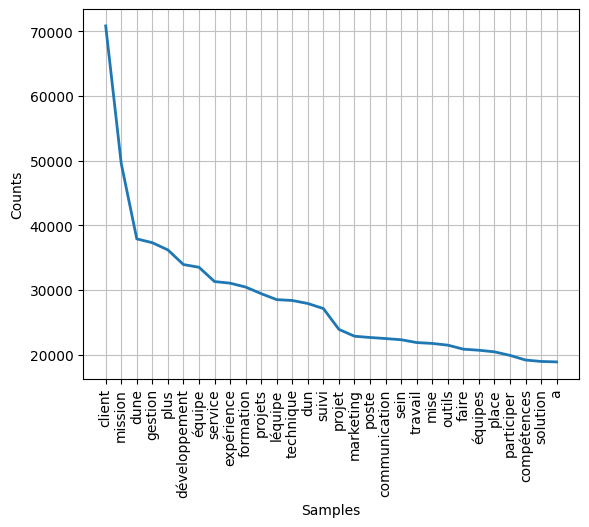

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Analyse des mots
all_words = [word for tokens in df_concat['Job_presentation_processed'] for word in tokens]
word_freq = FreqDist(all_words)


# Visualisation des mots fréquents
word_freq.plot(30, cumulative=False)
plt.show()

Visualisation des mots les plus fréquents

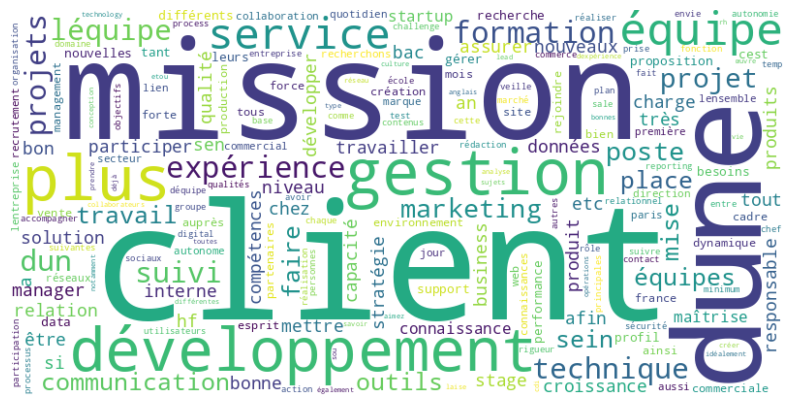

In [30]:
from wordcloud import WordCloud

# Générer un nuage de mots à partir de la distribution de fréquence des mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [31]:
# Analyse des phrases
df_concat['Sentence_length'] = df_concat['Job_presentation_processed'].apply(len)

# Phrase la plus courte
shortest_sentence = df_concat.loc[df_concat['Sentence_length'].idxmin(), 'Job_presentation_processed']
print("Phrase la plus courte:", ' '.join(shortest_sentence))

# Phrase la plus longue
longest_sentence = df_concat.loc[df_concat['Sentence_length'].idxmax(), 'Job_presentation_processed']
print("Phrase la plus longue:", ' '.join(longest_sentence))

# Longueur moyenne des phrases
avg_sentence_length = df_concat['Sentence_length'].mean()
print("Longueur moyenne des phrases:", avg_sentence_length)

Phrase la plus courte: vivier consultante
Phrase la plus longue: imagination machine entrepreneur of your startup project ecotourism chez imagination machine identifions idées startup ambitieuses impact positif impliquant généralement nouvelle technologie software hardware chacun projets travaillons plusieurs cofondateurstrices ceux ci mènent lexploration dun nouveau concept at imagination machine we identify ambitious startup idea that will have a positive impact usually involving new software or hardware technology each of these project we work with one or more cofounder they are leading the exploration of a new concept with u projet ecotourism vacances part grandissante familles privilégie destination proches rythme visites moins soutenu contact simple nature respect bilan carbone nourriture locale biologique chez imagination machine pensons quil existe opportunité davoir impact environnemental important créer entreprise succès améliorant loffre village vacances sappuyant concept fo

<ipython-input-31-56c5fe58f77f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Sentence_length'] = df_concat['Job_presentation_processed'].apply(len)


In [32]:
# Filtrer les observations dont la longueur du texte est inférieure à 100
short_presentations = df_concat[df_concat['Job_presentation_length'] < 100]['Job_presentation']

# Afficher les courtes présentations
for presentation in short_presentations:
    print(presentation)


Pipeline tech Pipeline chasse tech No requirements
Dév - cand. spontanées Développeurs Développeurs
(BR- Qt) Développeur Python / C#   
Lucille c'est super de travailler avec lucille fefe
Stagiaire Sales x x
CHASSE PO  Chasse pour les profils de product owner  Procduct Owner / Chef de Projet /
Vivier Manon xx xx
Chargé de supervision TBC TBC
Directeur.rice d'exploitation Directeur.rice de Production 15 ans d'expérience
Développeur frontend Ceci est la description de l'offre Cecie est le profil recherché
Test WeLoveDevs C'est un test très joli Une femme, ou un homme, ou entre deux, ou pas du tout. 
Directeur Général Réhabilitation . 
Vivier Consultant.e - -
A contacter  Profils à contacter si validés DevOps
Azure
AWS
Cybersécurité
Acquisition Manager XXXX XXXX
Gérant offre directe offre directe
Test vivier   test test
I - CVthèque Majorque valence valence
Consultants IMMO Offre Agent immo béta Offre Agent immo béta
Testeur test test test xxxx
Sales manager  (33) Test  Test
Account Manag

In [33]:
# Calculer la longueur de chaque texte dans la colonne 'Job_presentation'
df_concat['Job_presentation_length'] = df_concat['Job_presentation'].str.len()

# Obtenir les index des observations à supprimer
indexes_to_drop = df_concat[df_concat['Job_presentation_length'] < 100].index

# Supprimer les observations du dataframe
df_concat = df_concat.drop(indexes_to_drop)

# Réinitialiser les index du dataframe
df_concat = df_concat.reset_index(drop=True)



<ipython-input-33-9c91bb9f6e9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Job_presentation_length'] = df_concat['Job_presentation'].str.len()


In [34]:
df_concat.shape

(40621, 12)

## Encodage de IS_REMOTE

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Créer un dictionnaire personnalisé pour l'encodage souhaité
custom_mapping = {'no': 0, 'punctual': 1, 'partial': 2, 'fulltime': 3}

# Encodage des étiquettes de classe avec le dictionnaire personnalisé
df_concat['IS_JOB_REMOTE_encoded'] = df_concat['IS_JOB_REMOTE'].map(custom_mapping)

# Afficher le nouveau mapping
inverse_mapping = {v: k for k, v in custom_mapping.items()}
print(inverse_mapping)


{0: 'no', 1: 'punctual', 2: 'partial', 3: 'fulltime'}


<ipython-input-23-af821f10dacf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['IS_JOB_REMOTE_encoded'] = df_concat['IS_JOB_REMOTE'].map(custom_mapping)


In [24]:
df_concat['IS_JOB_REMOTE_encoded'].value_counts()

0    4805
2    1607
1    1359
3     289
Name: IS_JOB_REMOTE_encoded, dtype: int64

In [37]:
df_concat.head()

,JOB_NAME,JOB_DESCRIPTION,PROFILE,IS_JOB_REMOTE,Job_presentation,JOB_NAME_length,JOB_DESCRIPTION_length,PROFILE_length,Job_presentation_length,langue,Job_presentation_processed,Sentence_length,IS_JOB_REMOTE_encoded
0,Data Engineer,Être** Data Engineer **chez Wewyse c'est : \r\...,Ce que nous aimons chez Wewyse : \r\n* les per...,no,Data Engineer Être** Data Engineer **chez Wewy...,13,881,402,1298,fr,"[data, engineer, être, data, engineer, chez, w...",106,0
1,Customer Success Manager - CDD,L’objectif principal du Customer Success Manag...,* Idéalement de formation d’école de commerce ...,partial,Customer Success Manager - CDD L’objectif prin...,30,1544,673,2249,fr,"[customer, success, manager, cdd, lobjectif, p...",188,2
2,Account Executive Senior (April 2022),Nous cherchons un Account executive senior qui...,### Compétences clés\r\n\r\n* Vous avez un rée...,no,Account Executive Senior (April 2022) Nous che...,37,879,844,1762,fr,"[account, executive, senior, april, cherchons,...",146,0
3,Assistant(e) de Direction - CDD - Mi temps (H/F),MISSIONS\r\n\r\nRattaché(e) à la Direction Gén...,PROFIL\r\n\r\nVous avez une expérience similai...,no,Assistant(e) de Direction - CDD - Mi temps (H/...,48,560,484,1094,fr,"[assistante, direction, cdd, mi, temp, hf, mis...",87,0
4,CM Freelance (Bilingue Italien) 🇮🇹,Vous êtes à la tête d'un portefeuille clients ...,Vous avez déjà une expérience sur un poste de ...,punctual,CM Freelance (Bilingue Italien) 🇮🇹 Vous êtes à...,34,980,437,1453,fr,"[cm, freelance, bilingue, italien, tête, dun, ...",114,1


## train/test

In [38]:
# Diviser les données en ensembles d'entraînement et de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_concat['Job_presentation_processed'], df_concat['IS_JOB_REMOTE_encoded'], test_size=0.2, random_state=42)


# 5/ TF-IDF

## Vectorization des mots

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Créer une instance du vecteur TF-IDF
tfidf = TfidfVectorizer()

# Transformer les données d'entraînement en vecteurs TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transformer les données de test en vecteurs TF-IDF
X_test_tfidf = tfidf.transform(X_test_text)

## Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression


# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_RL = model.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_RL = model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report

# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train = classification_report(y_train, y_train_pred_RL)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test = classification_report(y_test, y_test_pred_RL)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train:")
print(classification_metrics_train)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test:")
print(classification_metrics_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculer la matrice de confusion du train et du test
confusion_mat_train = confusion_matrix(y_train, y_train_pred_RL)
confusion_mat_test = confusion_matrix(y_test, y_test_pred_RL)

# Afficher la matrice de confusion du train
print("Matrice de confusion du train:")
print(confusion_mat_train)

# Afficher la matrice de confusion du test
print("Matrice de confusion du test:")
print(confusion_mat_test)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Créer un modèle Random Forest avec des paramètres de régularisation
model_rf = RandomForestClassifier(n_estimators=100)
# Entraîner le modèle sur les données d'entraînement
model_rf.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_rf = model_rf.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_rf = model_rf.predict(X_test_tfidf)


In [44]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_rf = classification_report(y_train, y_train_pred_rf)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_rf = classification_report(y_test, y_test_pred_rf)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Random Forest:")
print(classification_metrics_train_rf)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Random Forest:")
print(classification_metrics_test_rf)

Mesures d'évaluation spécifiques pour le train avec Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16517
           1       1.00      1.00      1.00      6178
           2       1.00      1.00      1.00      8336
           3       1.00      1.00      1.00      1465

    accuracy                           1.00     32496
   macro avg       1.00      1.00      1.00     32496
weighted avg       1.00      1.00      1.00     32496

Mesures d'évaluation spécifiques pour le test avec Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76      4217
           1       0.85      0.24      0.38      1491
           2       0.62      0.35      0.45      2028
           3       0.91      0.32      0.48       389

    accuracy                           0.64      8125
   macro avg       0.75      0.47      0.52      8125
weighted avg       0.68      0.64      0.60      812

In [45]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Random Forest:")
print(confusion_matrix_train_rf)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Random Forest:")
print(confusion_matrix_test_rf)

Matrice de confusion pour le train avec Random Forest:
[[16499    11     6     1]
 [    8  6167     3     0]
 [    3     1  8330     2]
 [    0     1     4  1460]]
Matrice de confusion pour le test avec Random Forest:
[[4011   36  162    8]
 [ 956  365  170    0]
 [1282   25  717    4]
 [ 158    2  103  126]]


## XGBoost

In [46]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle XGBoost
model_xgb = xgb.XGBClassifier()

# Entraîner le modèle sur les données d'entraînement
model_xgb.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_xgb = model_xgb.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_xgb = model_xgb.predict(X_test_tfidf)

In [47]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_xgb = classification_report(y_train, y_train_pred_xgb)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_xgb = classification_report(y_test, y_test_pred_xgb)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec XGBoost:")
print(classification_metrics_train_xgb)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec XGBoost:")
print(classification_metrics_test_xgb)


Mesures d'évaluation spécifiques pour le train avec XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     16517
           1       0.97      0.53      0.69      6178
           2       0.86      0.68      0.76      8336
           3       0.99      0.78      0.87      1465

    accuracy                           0.80     32496
   macro avg       0.89      0.74      0.79     32496
weighted avg       0.83      0.80      0.80     32496

Mesures d'évaluation spécifiques pour le test avec XGBoost:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76      4217
           1       0.62      0.24      0.34      1491
           2       0.54      0.43      0.48      2028
           3       0.81      0.40      0.54       389

    accuracy                           0.64      8125
   macro avg       0.66      0.49      0.53      8125
weighted avg       0.63      0.64      0.60      8125



In [48]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec XGBoost:")
print(confusion_matrix_train_xgb)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec XGBoost:")
print(confusion_matrix_test_xgb)

Matrice de confusion pour le train avec XGBoost:
[[16073    58   378     8]
 [ 2407  3276   491     4]
 [ 2645    31  5655     5]
 [  239     8    81  1137]]
Matrice de confusion pour le test avec XGBoost:
[[3792  103  309   13]
 [ 803  354  330    4]
 [1034   96  878   20]
 [  99   16  118  156]]


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle SVM
model_svm = SVC()

# Entraîner le modèle sur les données d'entraînement
model_svm.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_svm = model_svm.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_svm = model_svm.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_svm = classification_report(y_train, y_train_pred_svm)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_svm = classification_report(y_test, y_test_pred_svm)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec SVM:")
print(classification_metrics_train_svm)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec SVM:")
print(classification_metrics_test_svm)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec SVM:")
print(confusion_matrix_train_svm)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec SVM:")
print(confusion_matrix_test_svm)

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle Multinomial Naive Bayes
model_nb = MultinomialNB()

# Entraîner le modèle sur les données d'entraînement
model_nb.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_nb = model_nb.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_nb = model_nb.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_nb = classification_report(y_train, y_train_pred_nb)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_nb = classification_report(y_test, y_test_pred_nb)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Multinomial Naive Bayes:")
print(classification_metrics_train_nb)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Multinomial Naive Bayes:")
print(classification_metrics_test_nb)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_nb = confusion_matrix(y_train, y_train_pred_nb)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_nb = confusion_matrix(y_test, y_test_pred_nb)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Multinomial Naive Bayes:")
print(confusion_matrix_train_nb)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Multinomial Naive Bayes:")
print(confusion_matrix_test_nb)

## KKN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle k-plus proches voisins
model_knn = KNeighborsClassifier()

# Entraîner le modèle sur les données d'entraînement
model_knn.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_knn = model_knn.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_knn = model_knn.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_knn = classification_report(y_train, y_train_pred_knn)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_knn = classification_report(y_test, y_test_pred_knn)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec KNN:")
print(classification_metrics_train_knn)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec KNN:")
print(classification_metrics_test_knn)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec KNN:")
print(confusion_matrix_train_knn)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec KNN:")
print(confusion_matrix_test_knn)

## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Convertir les étiquettes en représentation one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Créer un modèle de réseau de neurones
model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(4, activation='softmax'))

# Compiler le modèle
model_nn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement
model_nn.fit(X_train_tfidf, y_train_one_hot, epochs=2, batch_size=32, validation_data=(X_test_tfidf, y_test_one_hot))

# Prédire les étiquettes sur les données de test
y_pred_nn = model_nn.predict(X_test_tfidf)
y_pred_nn = tf.argmax(y_pred_nn, axis=1).numpy()

# Calculer l'accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Afficher les mesures d'évaluation spécifiques
classification_metrics_nn = classification_report(y_test, y_pred_nn)
print(classification_metrics_nn)

# Calculer la matrice de confusion
confusion_mat_nn = confusion_matrix(y_test, y_pred_nn)
print(confusion_mat_nn)


# 6/ TF-IDF pour plusieurs valleurs de n

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Tester différentes valeurs de n
n_values = [1, 2, 3, 4, 5]  

accuracy_scores = []

for n in n_values:
    # Créer une instance du vecteur TF-IDF avec la valeur de n correspondante
    tfidf = TfidfVectorizer(ngram_range=(1, n))

    # Transformer les données d'entraînement en vecteurs TF-IDF
    X_train_tfidf = tfidf.fit_transform(X_train_text)

    # Transformer les données de test en vecteurs TF-IDF
    X_test_tfidf = tfidf.transform(X_test_text)

    # Créer un modèle de régression logistique
    model = LogisticRegression()

    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train_tfidf, y_train)

    # Prédire les étiquettes sur les données de test
    y_pred = model.predict(X_test_tfidf)

    # Calculer l'accuracy et l'ajouter à la liste des scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Tracer le graphe résumant les résultats
plt.plot(n_values, accuracy_scores, marker='o')
plt.xlabel('Valeur de n')
plt.ylabel('Accuracy')
plt.title('Précision en fonction de la valeur de n')
plt.show()


# 7/ CountVectorizier

## Vectorization des mots

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Créer une instance du vecteur CountVectorizer
count_vectorizer = CountVectorizer()

# Transformer les données d'entraînement en vecteurs CountVectorizer
X_train_count = count_vectorizer.fit_transform(X_train_text)

# Transformer les données de test en vecteurs CountVectorizer
X_test_count = count_vectorizer.transform(X_test_text)

## Regression Logistique

In [ ]:
# Créer un modèle de régression logistique
model_lr = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model_lr.fit(X_train_count, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_lr = model_lr.predict(X_train_count)

# Prédire les étiquettes sur les données de test
y_test_pred_lr = model_lr.predict(X_test_count)

In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_lr = classification_report(y_train, y_train_pred_lr)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_lr = classification_report(y_test, y_test_pred_lr)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Régression Logistique:")
print(classification_metrics_train_lr)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Régression Logistique:")
print(classification_metrics_test_lr)

In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Régression Logistique:")
print(confusion_matrix_train_lr)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Régression Logistique:")
print(confusion_matrix_test_lr)

## Random Forest

In [ ]:
# Créer un modèle Random Forest
model_rf = RandomForestClassifier()

# Entraîner le modèle sur les données d'entraînement
model_rf.fit(X_train_count, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_rf = model_rf.predict(X_train_count)

# Prédire les étiquettes sur les données de test
y_test_pred_rf = model_rf.predict(X_test_count)

In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_rf = classification_report(y_train, y_train_pred_rf)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_rf = classification_report(y_test, y_test_pred_rf)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Random Forest:")
print(classification_metrics_train_rf)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Random Forest:")
print(classification_metrics_test_rf)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Random Forest:")
print(confusion_matrix_train_rf)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Random Forest:")
print(confusion_matrix_test_rf)

#8/ word2vec

## Vectorization des mots

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Prétraitement du texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

X_train_sentences = [text.split() for text in X_train_text]
X_test_sentences = [text.split() for text in X_test_text]

# Entraînement du modèle Word2Vec
model_w2v = Word2Vec(sentences=X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Vectorisation des données
X_train_vec = np.array([np.mean([model_w2v.wv[word] for word in sentence], axis=0) for sentence in X_train_sentences])
X_test_vec = np.array([np.mean([model_w2v.wv[word] for word in sentence if word in model_w2v.wv], axis=0) for sentence in X_test_sentences])

# Division des données
y_train = np.array(y_train)
y_test = np.array(y_test)

# Modèle de régression logistique
model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)

# Prédiction sur les données de test
y_pred_lr = model_lr.predict(X_test_vec)

# Mesures d'évaluation spécifiques
classification_metrics_lr = classification_report(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Affichage des mesures d'évaluation
print("Mesures d'évaluation spécifiques avec Régression Logistique :")
print(classification_metrics_lr)

# Affichage de la matrice de confusion
print("Matrice de confusion avec Régression Logistique :")
print(confusion_matrix_lr)


# 9/ Hugging Face

In [25]:
# Nouveaux dataframe pour HuggingFace

# Supposons que vous souhaitez conserver les colonnes 'colonne1', 'colonne2' et 'colonne3'
df = df_concat.loc[:, ['Job_presentation', 'IS_JOB_REMOTE_encoded']]

In [26]:
!pip install datasets  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 11.8 MB/s eta 0:00:00


In [28]:
from datasets import load_dataset
from datasets import Dataset
from datasets import DatasetDict

# Secondly, we convert the pandas dataset into a hugging-face dataset
dataset = Dataset.from_pandas(df)

# Last, we split the hugging-face dataset into a training set and a test set
dataset_train_test = dataset.train_test_split(test_size=0.20)
dataset_train_test

DatasetDict({
    train: Dataset({
        features: ['Job_presentation', 'IS_JOB_REMOTE_encoded', '__index_level_0__'],
        num_rows: 6448
    })
    test: Dataset({
        features: ['Job_presentation', 'IS_JOB_REMOTE_encoded', '__index_level_0__'],
        num_rows: 1612
    })
})

In [27]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.2 MB/s eta 0:00:00


In [29]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(example):
    return tokenizer(example, padding="max_length", truncation=True)

    
tokenized_datasets = dataset_train_test.map(tokenize_function, batched=True, input_columns='Job_presentation')


Map:   0%|          | 0/6448 [00:00<?, ? examples/s]

Map:   0%|          | 0/1612 [00:00<?, ? examples/s]

In [30]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['Job_presentation', 'IS_JOB_REMOTE_encoded', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6448
    })
    test: Dataset({
        features: ['Job_presentation', 'IS_JOB_REMOTE_encoded', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1612
    })
})

In [31]:
train_dataset = tokenized_datasets['train']
test_dataset = tokenized_datasets['test']  

In [32]:
tf_train_dataset = train_dataset.remove_columns(["Job_presentation"]).with_format("tensorflow")
tf_test_dataset = test_dataset.remove_columns(["Job_presentation"]).with_format("tensorflow")

In [33]:
import tensorflow as tf
train_features = {x: tf_train_dataset[x] for x in tokenizer.model_input_names}
#train_features = {x: tf_train_dataset[x].to_tensor() for x in tokenizer.model_input_names} for kaggle notebook
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, tf_train_dataset["IS_JOB_REMOTE_encoded"]))
train_tf_dataset = train_tf_dataset.shuffle(len(tf_train_dataset)).batch(8)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
#test_features = {x: tf_test_dataset[x].to_tensor() for x in tokenizer.model_input_names} for kaggle notebook
test_tf_dataset = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset["IS_JOB_REMOTE_encoded"]))
test_tf_dataset = test_tf_dataset.batch(8)

In [34]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=4)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#tf.keras.metrics.Precision()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.metrics.SparseCategoricalAccuracy()]
)

model.fit(train_tf_dataset, epochs=1)

 26/806 [..............................] - ETA: 12:28:21 - loss: 1.1296 - sparse_categorical_accuracy: 0.5577

In [ ]:
model.evaluate(test_tf_dataset)